# Einleitung

### Gefahr von Quantencomputer:

- Peter Shor entwickelte 1994 einen Algorithmus der Shor's Algorithm genannt wird
- Shor's Algorithm kann RSA (Primfaktorzerlegung) und ECC (Diskreter Logarithmus) brechen
- "Harvest Now, Decrypt Later"
- **Fragestellung**: Was ist jedoch der Trade-Off von Post-Quanten Kryptographie?

Shor, Peter W. “Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer.” SIAM Journal on Computing 26, no. 5 (1997): 1484–509. https://doi.org/10.1137/S0097539795293172.

![image](../research/images/Peter_Shor_2017_Dirac_Medal_Award_Ceremony.png)

[Peter Shor](https://en.wikipedia.org/wiki/Peter_Shor#/media/File:Peter_Shor_2017_Dirac_Medal_Award_Ceremony.png) in 2017




---

# Ablauf

1. Einleitung
2. Theorie
3. Standards und Technologien
4. Code & Setup
5. Auswertung 
6. Zusammenfassung

---

# Elliptic-curve Diffie-Hellman (ECDH)

Protokoll bei den Alice und Bob beide einen Public und Private Key haben um einen geheimen Schlüssel auszutauschen.

## Elliptische Kurven

- Format: $y^2 = x^3 + ax + b$
- **Skalar Multiplikation**: $A \to 2A \to 3A \to ... \to nA = C$
- Einfach $nA$ zu berechnen, schwer $n$ aus $A$ und $nA$ zu finden

![image](../research/images/elliptic_curve.png)




## ECDH-Ablauf

**Parameter**:
- Elliptische Kurve $E$ über $\mathbb{Z}_p$ mit $n$ (prim)
- Ein Startpunkt $P \in E(\mathbb{Z}_p), P \neq \infty$
- Eine key derivation function (KDF), z.B. eine Hashfunktion (One-Way Function)

**Ablauf**:

1. Alice wählt $x \in_R [1,n-1]$ und berechnet $X=xP$
2. Alice sendet $X$ an Bob
3. Bob wählt $y \in_R [1,n-1]$ und berechnet $Y=yP$
4. Bob sendet $Y$ an Alice
5. Bob berechnet $K = yX$ und $k=KDF(K)$
6. Alice berechnet $K = xY$ und $k=KDF(K)$

**Problem:** ECDLP kann durch Shor's Algorithmus gelöst werden → Quantencomputer brechen ECDH

## X25519

Als Standard für eine elliptische Kurve wird oft die von Dan Bernstein in 2005 erfundene Curve25519 benutzt.

- $p = 2^{255} - 19$
- 128-bit Sicherheit, sehr schnell
- Die Curve25519 ist die elliptische Kurve $Y^2=X^3+48662X^2 + X$

---

# Post-Quanten-Kryptographie

Für Kyber benötigen wir folgende 2 Grundlagen: Gitter und LWE.

## Gitter

- Kombination von Vektoren $B = \{v_1, v_2, ..., v_m\}$
- $n$ ist die Dimension von L und $m$ ist der Rang von L
- $B$ wird Basis von L genannt
- jeder Punkt im Gitter ist eine ganzzahlige Linearkombination dieser Basisvektoren.

$$ L = \{ a_1 b_1 + ... + a_n b_n \mid a_i \in \mathbb{Z} \} \sube \mathbb{Z}^n $$

**Beispiel**

($n=2$) und $B_1 = \{(1,0), (0,1)\}$

$L_1 = L(B_1) = \{B_1 x : x \in \mathbb{Z}^2\}$, wobei
$$ B_1 = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$


**Fundamental Parallelepiped:**
$P(B_1)$ ist der Raum, der von den Basisvektoren aufgespannt wird:
$$ P(B_1) = \{ a_1(1,0) + a_2(0,1) : a_1, a_2 \in [0,1) \} $$

![image](../research//images/lattice1.png)

## "Gute" vs. "Schlechte" Basis

![image](../research/images/lattice2_3.png)

$L_2 = L_3$, da beide Gitter dieselben Punkte enthalten --> ein Gitter kann durch verschiedene Basen erzeugt werden

Die Bedeutung für die Kryptographie:
Der Private Key ist die "gute Basis", der Public Key ist die "schlechte Basis" desselben Gitters.

- **Gute Basis ($B_2$):** Vektoren kurz, fast orthogonal → **Private Key**
- **Schlechte Basis ($B_3$):** Vektoren lang, fast parallel → **Public Key**

## Shortest Vector Problem (SVP)

Gegeben ist ein Gitter $L = L(B)$, finde den kürzesten Gittervektor

- SVP ist NP-schwer, sowohl für normale Computer als auch Quantencomputer

---

# Learning with Errors (LWE)

## Kernidee

Lineares Gleichungssystem + **kleiner Fehler**

$$b = As + e \pmod q$$

- $A$: öffentliche Matrix
- $s$: geheimer Vektor (Private Key)
- $e$: kleiner Fehlervektor
- $b$: verrauschtes Ergebnis (Public Key)

## Was hat das mit Gittern zu tun?

Die Sicherheit von LWE basiert darauf, dass das Lösen der Gleichung äquivalent zu einem schweren Gitterproblem (Shorter bzw. Closest Vector Problem - SVP/CVP) ist.

## Beispiel mit Zahlen statt Vektoren (Dimension 1, mod 100)

**Alice:**
- $A = 42$, $s = 3$, $e = 1$
- $b = 42 \cdot 3 + 1 = 127 \equiv 27$
- Public Key: $(42, 27)$

**Bob verschlüsselt $m=1$:**
- Bob: $r = 2$, $e' = 1$, $e'' = -1$
- $u = 42 \cdot 2 + 1 = 85$
- $v = 27 \cdot 2 + (-1) + 50 = 103 \equiv 3$
- $c = (u,v) = (85,3)$

**Alice entschüsselt (85,3):**
- $v - s \cdot u = 3 - 3 * 85 = 3 * 255 \equiv 48$
- $48$ näher an $50$ als $0$ → $m = 1$ ✓

---


# Kyber/ML-KEM

## Von LWE zu Kyber

| Problem | Struktur | Trade-off |
|---------|----------|-----------|
| LWE | Zahlen/Vektoren | Sicher, aber riesige Keys |
| Ring-LWE | Polynome | Effizient, aber weniger flexibel |
| **Module-LWE** | Vektoren von Polynomen | **Kyber:** Balance aus Sicherheit & Effizienz |

## Kyber-PKE

**Parameter:** $q = 3329$, $n = 256$, $k \in \{2,3,4\}$, $\eta_1 = 2$, $\eta_2 = 2$

**Key Generierung:** $b = As + e$ → Public Key $(A, t)$, Private Key $s$

**Verschlüsselung:** $u = A^T r + e_1$, $v = b^T r + e_2 + \lfloor q/2 \rfloor \cdot m$

**Entschlüsselung:** $m = \text{Round}(v - s^T u)$

## KEM vs. Key Exchange

| | ECDH | Kyber-KEM |
|--|------|-----------|
| Prinzip | Beide berechnen den Schlüssel | Einer "kapselt" Schlüssel |
| Ergebnis | Shared Secret | Shared Secret |

## Fujisaki-Okamoto Transform

**Problem:** PKE ist nur gegen passive Angreifer sicher

**Lösung:** Bei Decaps wird Ciphertext **neu berechnet** und verglichen

### Ablauf

Encapsulation (Alice):
Alice möchte ein Shared Secret $K'$ für Bob kapseln

1. Ziehe eine Nachricht $m \in \{0,1\}^n$ gleichverteilt zufällig.
2. Berechne mittels einer Hashfunktion $G$ das Paar $(K, r) = G(m \parallel H(pk))$
  - $K$ ist ein Pre-Shared-Secret
  - $r$ wird als deterministische Zufallsquelle für den PKE-Algorithmus verwendet
3. **Verschlüsselung**: Berechne den Ciphertext $c = \text{PKE.Enc}(pk, m; r)$. Durch die Verwendung von $r$ aus Schritt 2 ist die Verschlüsselung hier für den gegebenen Seed $m$ deterministisch
4. Das Shared Secret ist $K' = H(K \parallel H(c))$. Dies bindet den Schlüssel an den Ciphertext $c$ 

Decapsulation (Bob):
Bob erhält $c$ und muss $K'$ extrahieren, während er gleichzeitig gegen aktive Angreifer prüft
1. **PKE-Entschlüsselung**: Berechne $m' = \text{PKE.Dec}(sk_{PKE}, c)$
2. Berechne die Werte $(K, r) = G(m' \parallel H(pk))$ analog zu Alice
3. **Re-Verschlüsselung**: Berechne $c' = \text{PKE.Enc}(pk, m'; r)$
  - Da die Verschlüsselung durch $r$ deterministisch ist, muss $c'$ gleich $c$ sein, sofern $c$ nicht manipuliert wurde
4. Falls $c' = c$: Gib $K' = H(K \parallel H(c))$ zurück
5. Falls $c' \neq c$: Gib $K' = H(z \parallel H(c))$ zurück

# Kyber und ECDH

Auf Grund von "Harvest Now, Decrypt Later" empfiehlt das BSI und NIST sogenannte **Hybrid-Verfahren**.

## Das Hybrid-Prinzip (X25519Kyber768)

Chrome und Cloudflare nutzen bereits dieses Verfahren.

Es werden **2** Schlüsselaustausche gleichzeitig durchgeführt

1. ECDH und Kyber werden unabhängig voneinander gleichzeitig ausgeführt
3. **Schlüssel-Kombination:**
   - Der finale Schlüssel $K$ wird aus beiden Secrets berechnet:
   - $K = \text{KDF}(\text{SharedSecret}_{\text{ECDH}} \ \| \ \text{SharedSecret}_{\text{Kyber}})$

**Vorteile:**
- Falls Kyber eine noch nicht entdeckte mathematische Schwäche hat, schützt ECDH.
- Falls Quantencomputer kommen, schützt Kyber.

---

---

# PQC-TLS-Benchmark: Analyse & Ergebnisse

## 1. Warum Benchmarks?
*   **Problemstellung**: PQC-Schlüssel (z.B. ML-KEM/Kyber) sind viel größer als klassische Schlüssel (ECC).
*   **Fragestellung**: Führt die Größe zu spürbaren Verzögerungen im TLS-Handshake?
*   **Ziel**: Empirischer Vergleich unter realen Bedingungen.
    *   **Klassisch**: ECDH
    *   **Post-Quanten**: ML-KEM
    *   **Hybrid**: ECDH + ML-KEM (Klassische Sicherheit + Quanten-Sicherheit)
*   **Fokus**: Nicht nur CPU-Last, sondern Netzwerk-Verhalten (Latenz & Paketverlust).

## 2. Setup Files
Das `benchmarks`-Verzeichnis enthält eine isolierte Testumgebung.

*   **`docker-compose.yml`**
    *   Startet zwei Container: `server` (Nginx) und `client`.
    *   Definiert internes Netzwerk `oqs_net` (Isolierung von Störfaktoren).
*   **`nginx.conf`**
    *   Konfiguration für den OQS-Nginx-Server.
    *   Aktiviert **TLS 1.3**.
    *   Definiert Krypto-Gruppen (`ssl_ecdh_curve`): `mlkem512`, `p256_mlkem512`, etc.
*   **`Dockerfile.client`**
    *   Baut Client-Image auf Basis von `openquantumsafe/curl`.
    *   **Wichtig**: Installiert `iproute2` für `tc` (Traffic Control).
    *   Zweck: Simulation von schlechten Netzwerkbedingungen.

# PQC-TLS Benchmark: Code Explained

Dieses Notebook zerlegt das `benchmark.py` Skript in seine Einzelteile. Es erklärt Schritt für Schritt, wie die Messumgebung aufgebaut ist, wie Netzwerkbedingungen simuliert werden und wie die Messungen durchgeführt werden.

## 1. Imports & Konfiguration

Hier definieren wir die zu testenden Algorithmen (`ALGORITHMS`). Wir unterscheiden zwischen:
*   **ML-KEM (Kyber)**: Post-Quanten-Verfahren (z.B. `mlkem512`).
*   **P-Curves (ECC)**: Klassische Elliptische Kurven (z.B. `P-256`).
*   **Hybride**: Kombination aus beiden (z.B. `p256_mlkem512`).

Außerdem legen wir die Test-Szenarien für Latenz (`LATENCIES`) und Paketverlust (`LOSS_RATES`) fest.

### Übersicht der Algorithmen & Schlüsselgrößen

Hier sind die Details zu den verwendeten kryptographischen Verfahren. Die Größe der Schlüssel (Public Key) und der verschlüsselten Nachricht (Ciphertext) ist entscheidend für die Performance im Netzwerk.

| Sicherheits-Level | Algorithmus | Typ | Public Key (Bytes) | Ciphertext (Bytes) | Anmerkung |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **Level 1** (AES-128) | **P-256** | Klassisch | 65 | 65 | Sehr klein, passt in 1 Paket |
| | **ML-KEM-512** | PQC | 800 | 768 | ~12x größer als P-256 |
| | **P-256 + ML-KEM-512** | Hybrid | 865 | 833 | Summe aus beiden |
| **Level 3** (AES-192) | **P-384** | Klassisch | 97 | 97 | |
| | **ML-KEM-768** | PQC | 1184 | 1088 | Standard-Empfehlung |
| | **P-384 + ML-KEM-768** | Hybrid | 1281 | 1185 | |
| **Level 5** (AES-256) | **P-521** | Klassisch | 133 | 133 | |
| | **ML-KEM-1024** | PQC | 1568 | 1568 | **> 1500 Bytes (MTU)** -> Fragmentierung nötig! |
| | **P-521 + ML-KEM-1024** | Hybrid | 1701 | 1701 | Fragmentierung nötig |

In [20]:
import json
import os
import sys
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np

# Algorithmen Konfiguration
ALGORITHMS = [
    "mlkem512", "P-256", "p256_mlkem512",
    "mlkem768", "P-384", "p384_mlkem768",
    "mlkem1024", "P-521", "p521_mlkem1024"
]

# Test-Parameter
LATENCIES = [0, 50] # Millisekunden (Ping)
LOSS_RATES = [0, 5]     # Prozent (Paketverlust)
ITERATIONS = 5         # Anzahl der Messungen pro Szenario

## 2. Hilfsfunktion: `run_command`

Da wir Docker-Container steuern müssen, führen wir Shell-Befehle aus. Diese Funktion kapselt `subprocess.run` und fängt den Output ab.

In [21]:
def run_command(cmd, shell=True):
    # print(f"Debug: {cmd}")
    result = subprocess.run(cmd, shell=shell, capture_output=True, text=True)
    if result.returncode != 0:
        # Docker compose kann Warnungen auf stderr ausgeben, auch bei Erfolg.
        pass 
    return result.stdout.strip()

## 3. Setup: Testdatei erstellen

Um den Datendurchsatz (Transfer) zu messen, benötigen wir eine Datei definierter Größe. Wir erstellen eine 10MB Datei (`10MB.bin`) mit Zufallsdaten und kopieren sie in den Webserver-Container (`server`).

In [22]:
def setup_server_file():
    print("Setting up 10MB test file...")
    filename = "10MB.bin"
    # Lokale 10MB Datei mit Zufallsdaten erstellen
    with open(filename, "wb") as f:
        f.write(os.urandom(10 * 1024 * 1024))
    
    # In den Server-Container kopieren
    cmd = f"docker compose cp {filename} server:/opt/nginx/html/testfile"
    run_command(cmd)
    
    # Lokal aufräumen
    os.remove(filename)

## 4. Netzwerk-Simulation: `set_network`

Das ist das Herzstück der Realismus-Simulation. Wir nutzen das Linux-Tool `tc` (Traffic Control) und `netem` (Network Emulator) im **Client-Container**.

Der Befehl `tc qdisc add dev eth0 root netem delay Xms loss Y%` weist den Kernel an, ausgehende Pakete künstlich zu verzögern oder zu verwerfen.

In [23]:
def set_network(latency_ms, loss_percent):
    # Zuerst alte Regeln löschen
    run_command("docker compose exec -T client tc qdisc del dev eth0 root")
    
    args = []
    if latency_ms > 0:
        args.append(f"delay {latency_ms}ms")
    if loss_percent > 0:
        args.append(f"loss {loss_percent}%")
    
    if args:
        # Befehl bauen: z.B. "tc qdisc add dev eth0 root netem delay 50ms loss 5%"
        cmd = f"docker compose exec -T client tc qdisc add dev eth0 root netem {' '.join(args)}"
        run_command(cmd)

## 5. Messung: Handshake (`benchmark_handshake`)

Hier messen wir exakt, wie lange der **TLS-Handshake** dauert.

*   Wir nutzen `curl`.
*   `--curves {algo}`: Zwingt `curl`, einen bestimmten Algorithmus (z.B. ML-KEM) zu nutzen.
*   ` -w %{time_appconnect}`: Gibt die Zeit vom Start bis zum fertigen Handshake zurück.
*   `-o /dev/null`: Wirft den Dateiinhalt weg (uns interessiert nur die Zeit).

In [24]:
def benchmark_handshake(algo, latency):
    # URL: Eine kleine Datei (index.html), da wir nur den Handshake wollen.
    cmd = f"docker compose exec -T client curl -k --curves {algo} -o /dev/null -s -w %{{time_appconnect}} https://server:4433/index.html"
    out = run_command(cmd)
    try:
        val = float(out)
        return val
    except:
        return None

## 6. Messung: Transfer (`benchmark_transfer`)

Hier messen wir, wie lange der Download der 10MB Datei dauert.

*   `time_total`: Die Gesamtzeit (Handshake + Download).
*   `time_appconnect`: Die Handshake-Zeit.
*   **Rechnung**: `Transfer-Zeit` = `time_total` - `time_appconnect`.

So isolieren wir die reine Datengeschwindigkeit von der Handshake-Dauer.

In [25]:
def benchmark_transfer(algo, latency):
    # URL: Die große 10MB Datei (testfile)
    cmd = f"docker compose exec -T client curl -k --curves {algo} -o /dev/null -s -w %{{time_appconnect}},%{{time_total}} https://server:4433/testfile"
    out = run_command(cmd)
    try:
        parts = out.split(',')
        if len(parts) != 2: return None
        t_hs = float(parts[0])
        t_total = float(parts[1])
        return t_total - t_hs
    except:
        return None

## 7. Visualisierung (`plot_results` & `plot_boxplots`)

Diese Funktionen nutzen `matplotlib`, um die gesammelten Daten darzustellen.

*   **Bar Plot**: Zeigt die Durchschnittswerte gruppiert nach Netzwerk-Szenario.
*   **Box Plot**: Zeigt die Verteilung der Messwerte (Min, Max, Median). Das ist besonders wichtig bei Packet Loss, um Ausreißer zu erkennen.

In [26]:
def plot_results(results):
    # Unique scenarios (lat, loss)
    scenarios = sorted(list(set((r['latency_ms'], r.get('packet_loss_percent', 0)) for r in results)))
    algos = sorted(list(set(r['algorithm'] for r in results)))

    # Setup data structures
    # We want grouped bars. Outer group: Scenario. Inner group: Algo.

    x = np.arange(len(scenarios))  # the label locations
    width = 0.35  # the width of the bars

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(max(12, len(scenarios)*2), 6))

    # Prepare data for easy plotting
    # {algo: [val_at_scen0, val_at_scen1]}
    hs_data = {algo: [] for algo in algos}
    tx_data = {algo: [] for algo in algos}

    for algo in algos:
        for lat, loss in scenarios:
            # Find matching result
            res = next((r for r in results if r['latency_ms'] == lat and r.get('packet_loss_percent', 0) == loss and r['algorithm'] == algo), None)
            hs_data[algo].append(res['handshake_time_s'] if res else 0)
            tx_data[algo].append(res['transfer_time_s'] if res else 0)

    # Plot Handshake
    multiplier = 0
    bar_width = 0.8 / len(algos)

    for algo, measurements in hs_data.items():
        offset = bar_width * multiplier
        rects = ax1.bar(x + offset, measurements, bar_width, label=algo)
        multiplier += 1

    ax1.set_ylabel('Time (s)')
    ax1.set_title('Handshake Time by Network Condition')
    ax1.set_xticks(x + bar_width * (len(algos) - 1) / 2)
    ax1.set_xticklabels([f"{lat}ms, {loss}% Loss" for lat, loss in scenarios], rotation=45, ha='right')
    ax1.legend()
    # ax1.set_yscale('log') # Optional: log scale if differences are huge

    # Plot Transfer
    multiplier = 0
    for algo, measurements in tx_data.items():
        offset = bar_width * multiplier
        rects = ax2.bar(x + offset, measurements, bar_width, label=algo)
        multiplier += 1

    ax2.set_ylabel('Time (s)')
    ax2.set_title('Transfer Time (10MB) by Network Condition')
    ax2.set_xticks(x + bar_width * (len(algos) - 1) / 2)
    ax2.set_xticklabels([f"{lat}ms, {loss}% Loss" for lat, loss in scenarios], rotation=45, ha='right')
    ax2.legend()

    plt.tight_layout()
    plt.show()

In [27]:
def plot_boxplots(results):
    # Unique scenarios (lat, loss)
    scenarios = sorted(list(set((r['latency_ms'], r.get('packet_loss_percent', 0)) for r in results)))

    # Define groups: (Label, Kyber_Algo, ECDHE_Algo, Hybrid_Algo)
    groups = [
        ("Level 1\n(ML-KEM-512 / P-256)", "mlkem512", "P-256", "p256_mlkem512"),
        ("Level 3\n(ML-KEM-768 / P-384)", "mlkem768", "P-384", "p384_mlkem768"),
        ("Level 5\n(ML-KEM-1024 / P-521)", "mlkem1024", "P-521", "p521_mlkem1024")
    ]

    fig, axes = plt.subplots(len(scenarios), 2, figsize=(16, 8 * len(scenarios)))
    if len(scenarios) == 1:
        axes = np.expand_dims(axes, axis=0)

    for i, (lat, loss) in enumerate(scenarios):
        lat_results = {r['algorithm']: r for r in results if r['latency_ms'] == lat and r.get('packet_loss_percent', 0) == loss}

        y_locs = np.arange(len(groups))

        # Prepare data arrays
        k_hs, e_hs, h_hs = [], [], []
        k_tx, e_tx, h_tx = [], [], []

        for label, k_algo, e_algo, h_algo in groups:
            k_res = lat_results.get(k_algo)
            e_res = lat_results.get(e_algo)
            h_res = lat_results.get(h_algo)

            k_hs.append(k_res['handshake_raw'] if k_res else [])
            e_hs.append(e_res['handshake_raw'] if e_res else [])
            h_hs.append(h_res['handshake_raw'] if h_res else [])

            k_tx.append(k_res['transfer_raw'] if k_res else [])
            e_tx.append(e_res['transfer_raw'] if e_res else [])
            h_tx.append(h_res['transfer_raw'] if h_res else [])

        # Plot Helper
        def draw_grouped_boxplot(ax, data1, data2, data3, title):
            # data1=Kyber, data2=ECDHE, data3=Hybrid

            # Box 1 (Kyber) at y - 0.2
            bp1 = ax.boxplot(data1, positions=y_locs - 0.2, widths=0.15, vert=False, patch_artist=True)
            # Box 2 (ECDHE) at y
            bp2 = ax.boxplot(data2, positions=y_locs, widths=0.15, vert=False, patch_artist=True)
            # Box 3 (Hybrid) at y + 0.2
            bp3 = ax.boxplot(data3, positions=y_locs + 0.2, widths=0.15, vert=False, patch_artist=True)

            # Coloring
            for patch in bp1['boxes']: patch.set_facecolor('skyblue')     # Kyber
            for patch in bp2['boxes']: patch.set_facecolor('lightsalmon') # ECDHE
            for patch in bp3['boxes']: patch.set_facecolor('lightgreen')  # Hybrid

            ax.set_yticks(y_locs)
            ax.set_yticklabels([g[0] for g in groups])
            ax.invert_yaxis()
            ax.set_title(title)
            ax.set_xlabel("Time (s)")

            # Legend
            ax.legend([bp1["boxes"][0], bp2["boxes"][0], bp3["boxes"][0]],
                      ['Kyber/ML-KEM', 'ECDHE', 'Hybrid'], loc='best')

        draw_grouped_boxplot(axes[i][0], k_hs, e_hs, h_hs, f"Handshake Time @ {lat}ms / {loss}% Loss")
        draw_grouped_boxplot(axes[i][1], k_tx, e_tx, h_tx, f"Transfer Time (10MB) @ {lat}ms / {loss}% Loss")


    plt.tight_layout()
    plt.show()

## 8. Main Loop (Der Ablauf)

Hier wird alles zusammengeführt. Das Skript iteriert über:
1.  **Latenzen** (0ms, 50ms, ...)
2.  **Verlustraten** (0%, 5%, ...)
3.  **Algorithmen** (P-256, ML-KEM-512, ...)

Für jede Kombination werden mehrere Messungen durchgeführt und die Ergebnisse gespeichert.

Starting Benchmark...
Setting up 10MB test file...

--- Latency: 0ms, Loss: 0% ---
Benchmarking mlkem512 [PK: 800B, CT: 768B] ..... Done. HS: 0.0380s, TX: 0.0282s
Benchmarking P-256 [PK: 65B, CT: 65B] ..... Done. HS: 0.0355s, TX: 0.0270s
Benchmarking p256_mlkem512 [PK: 865B, CT: 833B] ..... Done. HS: 0.0492s, TX: 0.0258s
Benchmarking mlkem768 [PK: 1184B, CT: 1088B] ..... Done. HS: 0.0343s, TX: 0.0232s
Benchmarking P-384 [PK: 97B, CT: 97B] ..... Done. HS: 0.0353s, TX: 0.0253s
Benchmarking p384_mlkem768 [PK: 1281B, CT: 1185B] ..... Done. HS: 0.0499s, TX: 0.0252s
Benchmarking mlkem1024 [PK: 1568B, CT: 1568B] ..... Done. HS: 0.0339s, TX: 0.0251s
Benchmarking P-521 [PK: 133B, CT: 133B] ..... Done. HS: 0.0378s, TX: 0.0263s
Benchmarking p521_mlkem1024 [PK: 1701B, CT: 1701B] ..... Done. HS: 0.0532s, TX: 0.0253s

--- Latency: 0ms, Loss: 5% ---
Benchmarking mlkem512 [PK: 800B, CT: 768B] ..... Done. HS: 0.0331s, TX: 0.0350s
Benchmarking P-256 [PK: 65B, CT: 65B] ..... Done. HS: 0.0724s, TX: 0.1094

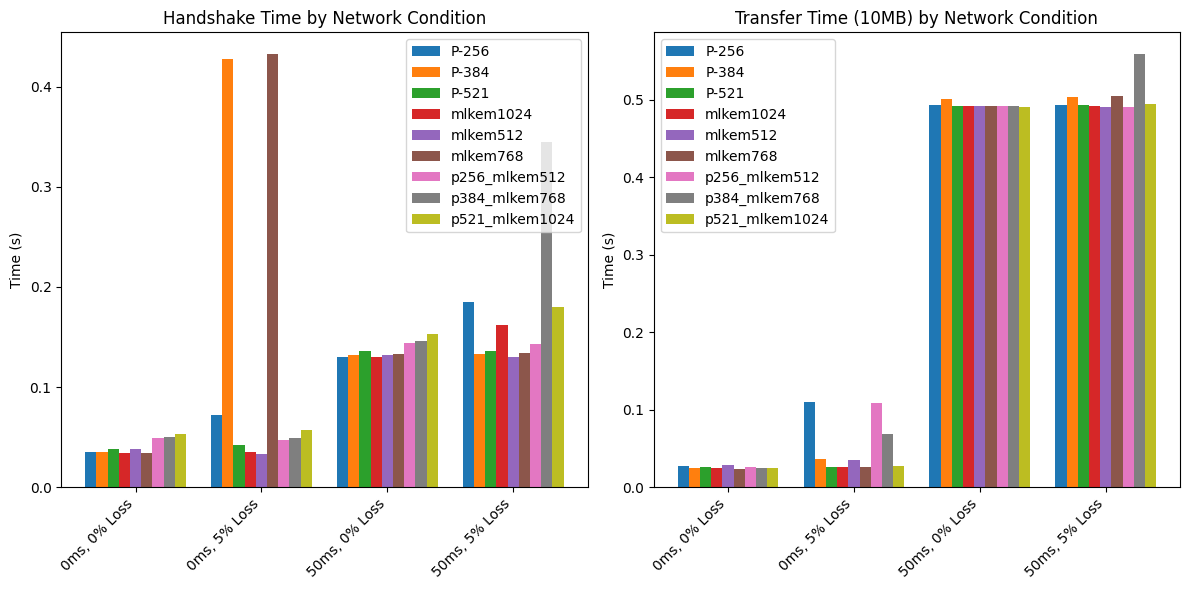

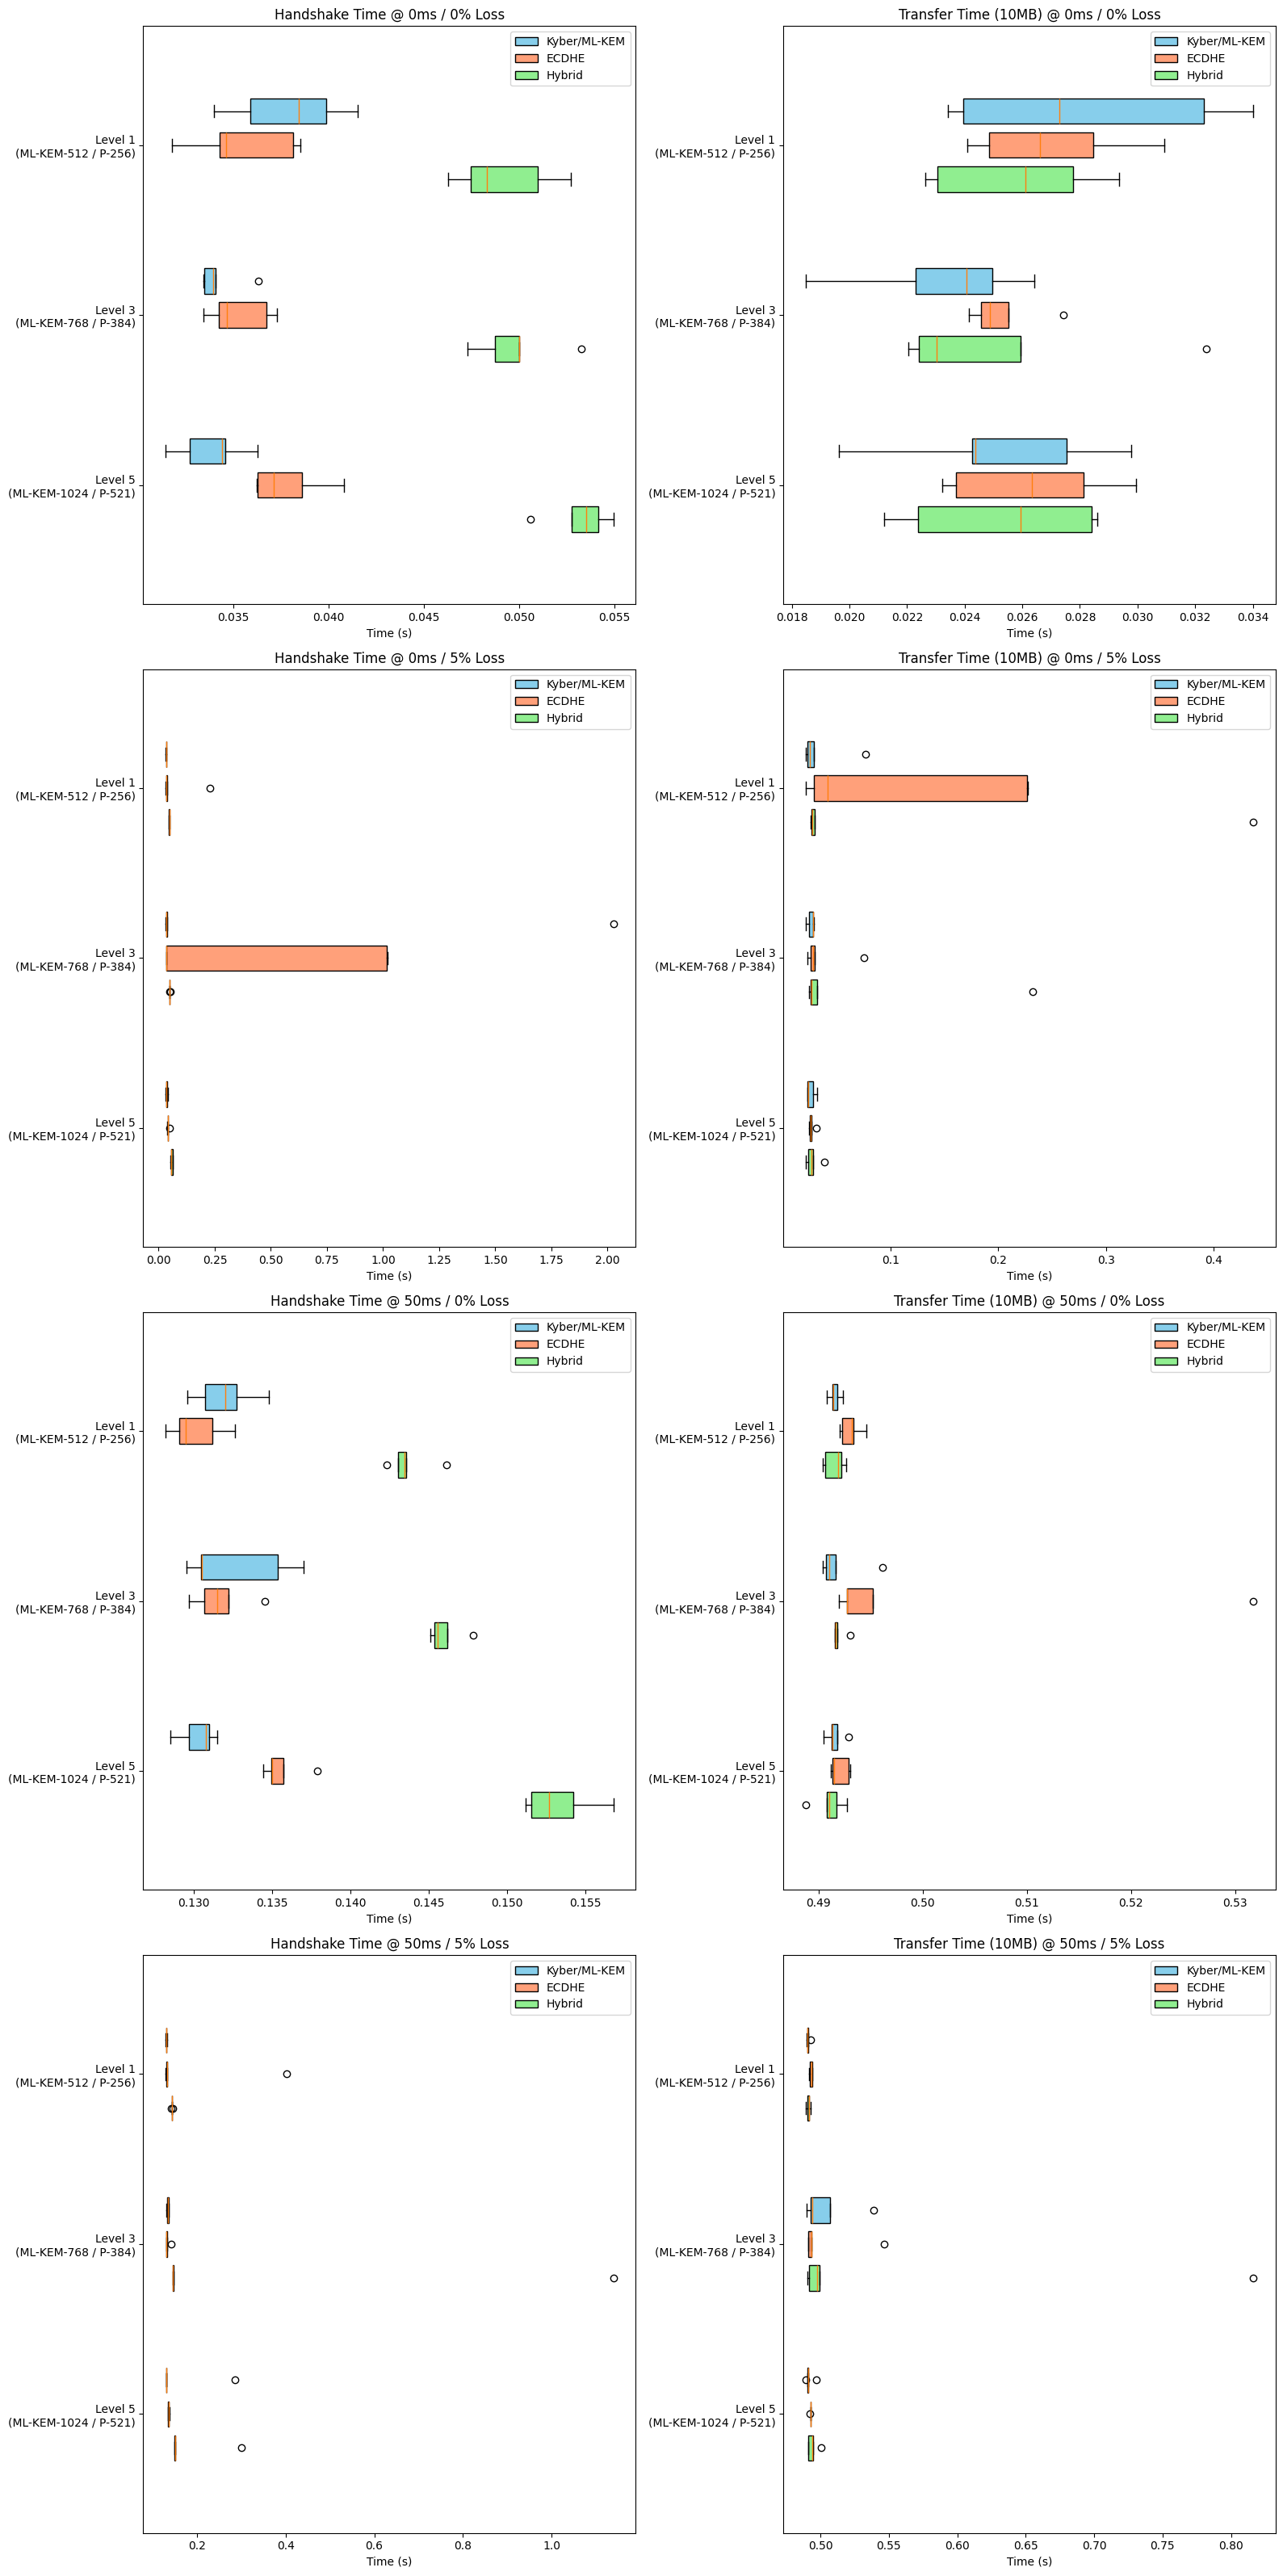

In [28]:
def run_benchmark():
    print("Starting Benchmark...")
    setup_server_file()

    final_results = []

    for lat in LATENCIES:
        for loss in LOSS_RATES:
            print(f"\n--- Latency: {lat}ms, Loss: {loss}% ---")
            set_network(lat, loss)
            for algo in ALGORITHMS:
                details = ALGO_DETAILS.get(algo, {"pk": "?", "ct": "?", "label": algo})
                print(f"Benchmarking {algo} [PK: {details['pk']}B, CT: {details['ct']}B] ", end="", flush=True)

                hs_times = []
                tx_times = []

                # Use a few warmups
                benchmark_handshake(algo, lat)

                for _ in range(ITERATIONS):
                    hs = benchmark_handshake(algo, lat)
                    if hs is not None:
                        hs_times.append(hs)

                    tx = benchmark_transfer(algo, lat)
                    if tx is not None:
                        tx_times.append(tx)
                    print(".", end="", flush=True)

                avg_hs = sum(hs_times)/len(hs_times) if hs_times else 0
                avg_tx = sum(tx_times)/len(tx_times) if tx_times else 0

                print(f" Done. HS: {avg_hs:.4f}s, TX: {avg_tx:.4f}s")

                final_results.append({
                    "latency_ms": lat,
                    "packet_loss_percent": loss,
                    "algorithm": algo,
                    "handshake_time_s": avg_hs,
                    "transfer_time_s": avg_tx,
                    "key_details": ALGO_DETAILS.get(algo, {}),
                    "handshake_raw": hs_times,
                    "transfer_raw": tx_times
                })

    # Cleanup
    set_network(0, 0)

    # Save Results
    json_path = "results.json"
    with open(json_path, 'w') as f:
        json.dump(final_results, f, indent=2)
    print(f"\nResults saved to {json_path}")

    # Plotting
    try:
        plot_results(final_results)
        plot_boxplots(final_results)
    except Exception as e:
        print(f"Plotting failed: {e}")

run_benchmark()

## 4. Ergebnisse & Auswertung

### A. Latenz (Ping) - Detailanalyse
*   **0ms (Reine Rechenleistung)**:
    *   **Warum ist ML-KEM schnell?** ML-KEM basiert auf Gitter-Mathematik (Matrix-Vektor-Multiplikation). Das ist für CPUs effizienter zu berechnen als die komplexe Skalarmultiplikation auf Elliptischen Kurven (ECDHE).
    *   **Ergebnis**: Trotz größerer Schlüssel ist die *Berechnung* von Kyber oft schneller als P-256.
    *   **Hybrid**: Hier addieren sich die Zeiten (~35ms Kyber + ~35ms ECC = ~70ms), aber es bleibt im Millisekunden-Bereich.
*   **50ms / 100ms (Netzwerk-Dominanz)**:
    *   **Der "Equalizer"**: Ein Handshake benötigt 1 Round-Trip (Hin- und Rückweg).
    *   **Rechnung**: Bei 50ms Ping wartet man garantiert 50ms auf das Netzwerk. Ob die Berechnung 3ms oder 10ms dauert, ist für den Nutzer nicht spürbar.
    *   **Bandbreite**: Ob 1KB (Kyber) oder 65 Byte (ECC) übertragen werden, dauert bei heutigen Geschwindigkeiten (z.B. 100 Mbit/s) nur Mikrosekunden Unterschied.

### B. Packet Loss (Paketverlust) - Warum PQC leidet
*   **MTU-Grenze (1500 Bytes)**:
    *   **Klassisch (P-256)**: Public Key (~65B) + Header passt bequem in **1 Paket**. Wahrscheinlichkeit für Verlust = $p$.
    *   **PQC (ML-KEM-1024)**: Public Key (~1568B) + Header > 1500B. Muss in **2 Pakete** zerteilt werden.
*   **Die Mathematik**:
    *   Damit der Handshake klappt, müssen *beide* Fragmente ankommen.
    *   Verlustwahrscheinlichkeit steigt: Das Gesamtrisiko ist höher als bei einem einzelnen Paket.
    *   **Folge**: TCP muss verlorene Fragmente neu senden (Retransmission). Das kostet Zeit (mindestens 1x RTT extra). Daher die "Ausreißer" in den Messungen bei Kyber.
    *   **Levels**: Level 5 (größere Keys) ist hier anfälliger als Level 1.

### C. Datentransfer (10MB) - Warum alles gleich ist
*   **Entkopplung**: Der *Handshake* dient nur dazu, sich auf ein gemeinsames Geheimnis zu einigen.
*   **Symmetrische Phase**: Sobald das Geheimnis da ist, wechseln beide Seiten auf symmetrische Verschlüsselung (z.B. **AES-256-GCM** oder **ChaCha20**).
*   **Hardware-Support**: Moderne CPUs haben Hardware-Beschleunigung für AES (AES-NI).
*   **Ergebnis**: Egal ob das Geheimnis via Kyber oder ECC ausgetauscht wurde – die AES-Verschlüsselung der 10MB Datei läuft immer gleich schnell. Der Flaschenhals ist hier nur die Bandbreite.

### D. Vergleich der Sicherheits-Level (Level 1 vs. 5)
*   **Handshake**:
    *   **PQC pur**: Der Unterschied zwischen ML-KEM-512 (Level 1) und ML-KEM-1024 (Level 5) ist in der reinen Berechnung fast nicht messbar (Gitter-Operationen skalieren sehr gut).
    *   **Hybrid**: Hier entstehen messbare Unterschiede vor allem durch den *klassischen* Partner. P-521 (genutzt für Level 5) ist rechnerisch aufwändiger als P-256 (Level 1). Daher sind Level-5-Hybride etwas langsamer als Level-1-Hybride.
*   **Transfer**:
    *   **Kein Unterschied**: Ein ausgehandelter symmetrischer Schlüssel (z.B. 256 Bit) ist immer gleich groß und gleich schnell, egal ob er ursprünglich mit Level 1 (niedrig) oder Level 5 (hoch) geschützt wurde.